In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# create the features and the number of examples

(100, 2)
(100, 1)


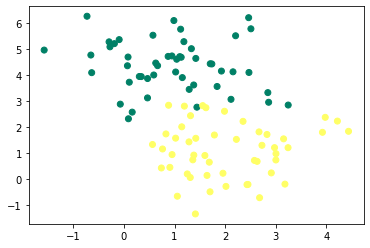

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0],1))

print(X.shape)
print(y.shape)

plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.show()


# 

![](pic/capture2.png)

# initiqlisqtion des poids dentré le bias

In [3]:
def initialisation(x):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return(W,b)

## appel initialisation(x)

In [4]:
#W,b = initialisation(X)
#print(W.shape)
#print(b.shape)

# la somme de poid d'entré foix vecteur d'entré x(i)*w(i) +bias et affictation de la fonction de noronne 

![](pic/capture.png)

In [5]:
def model(x,w,b):
    Z = x.dot(w) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [6]:
def log_loss(A,y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [7]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T,A-y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [8]:
def update(dW, db,W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [21]:
def predict(X, W, b):
    A = model(X,W,b)
    print(A)
    return A >= 0.5

In [10]:
from sklearn.metrics import accuracy_score

In [17]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    #initialization W,b
    
    W, b = initialisation(X)
    loss = []
    for i in range(n_iter):
        A = model(X,W,b)
        loss.append(log_loss(A,y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db,W, b, learning_rate)
        
    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))
    
    plt.plot(loss)
    plt.show()
    
    return (W, b)


0.87


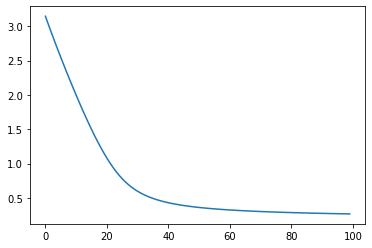

In [18]:
W, b = artificial_neuron(X, y)

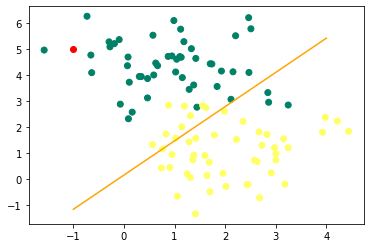

In [19]:
new_plant = np.array([-1,5])

x0 = np.linspace(-1, 4, 100 )
x1 = (-W[0] * x0 - b) /W[1]

plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x0, x1, c='orange')
plt.show()

In [22]:
predict(new_plant, W, b)

[0.00517794]


array([False])